In [1]:
# Menghubungkan Google Drive ke Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


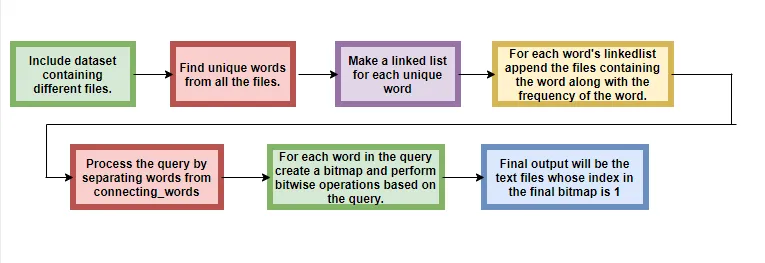

In [10]:
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/1_1FMoK_HWvk1IBaMelUXibw.jpg")

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize , word_tokenize
import glob
import re
import os
import numpy as np
import sys
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
Stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Menerapkan fungsi pembantu

In [28]:
def finding_all_unique_words_and_freq(words):
    words_unique = []
    word_freq = {}
    for word in words:
        if word not in words_unique:
            words_unique.append(word)
    for word in words_unique:
        word_freq[word] = words.count(word)
    return word_freq
def finding_freq_of_word_in_doc(word,words):
    freq = words.count(word)

def remove_special_characters(text):
    regex = re.compile('[^a-zA-Z0-9\s]')
    text_returned = re.sub(regex,'',text)
    return text_returned

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2848781559.py:14: SyntaxWarning: invalid escape sequence '\s'
  regex = re.compile('[^a-zA-Z0-9\s]')


Menemukan kumpulan kata unik dari semua dokumen set data

In [31]:
import glob
import re
import os

all_words = []
dict_global = {}
file_folder = '/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/*'
idx = 1
files_with_index = {}

for file in glob.glob(file_folder):
    # Lewati file yang bukan teks (.txt)
    if not file.endswith(".txt"):
        continue

    print(file)
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()

    # bersihkan teks
    text = remove_special_characters(text)
    text = re.sub(re.compile(r'\d'), '', text)  # pakai r'' untuk hilangkan warning escape sequence

    # tokenisasi
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    words = [word for word in words if len(word) > 1]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in Stopwords]

    dict_global.update(finding_all_unique_words_and_freq(words))
    files_with_index[idx] = os.path.basename(file)
    idx += 1

unique_words_all = set(dict_global.keys())
print("Total kata unik:", len(unique_words_all))

/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/narendra modi.txt
/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/shinzo abe.txt
/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/badminton.txt
/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/table tennis.txt
/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/lee quan yew.txt
/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/barack obama.txt
/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/queen elizabeth.txt
/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu3/data/baseball.txt
Total kata unik: 725


Mendefinisikan linkedlist

In [32]:
class Node:
    def __init__(self ,docId, freq = None):
        self.freq = freq
        self.doc = docId
        self.nextval = None

class SlinkedList:
    def __init__(self ,head = None):
        self.head = head

Membuat linkedlist untuk setiap kata dan menyimpan semua node (yang berisi nama file dan frekuensi kata masing-masing) dalam linkedlist.

In [34]:
linked_list_data = {}
for word in unique_words_all:
    linked_list_data[word] = SlinkedList()
    linked_list_data[word].head = Node(1, Node)

word_freq_in_doc = {}
idx = 1
file_folder = 'data/*.txt'   # hanya baca file teks

for file in glob.glob(file_folder):
    with open(file, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read()
    text = remove_special_characters(text)
    text = re.sub(re.compile(r'\d'), '', text)  # pakai r'' agar tidak warning
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    words = [word for word in words if len(word) > 1]
    words = [word.lower() for word in words]
    words = [word for word in words if word not in Stopwords]

    word_freq_in_doc = finding_all_unique_words_and_freq(words)
    for word in word_freq_in_doc.keys():
        linked_list = linked_list_data[word].head
        while linked_list.nextval is not None:
            linked_list = linked_list.nextval
        linked_list.nextval = Node(idx, word_freq_in_doc[word])
    idx = idx + 1

Pemrosesan kueri dan pembuatan keluaran

In [35]:
query = input('Enter your query:')
query = word_tokenize(query)
connecting_words = []
cnt = 1
different_words = []
bitwise_op = []
for word in query:
    if word.lower() != "and" and word.lower() != "or" and word.lower() != "not":
        different_words.append(word.lower())
    else:
        connecting_words.append(word.lower())
print(connecting_words)
total_files = len(files_with_index)
zeroes_and_ones = []
zeroes_and_ones_of_all_words = []
for word in (different_words):
    if word.lower() in unique_words_all:
        zeroes_and_ones = [0] * total_files
        linkedlist = linked_list_data[word].head
        print(word)
        while linkedlist.nextval is not None:
            zeroes_and_ones[linkedlist.nextval.doc - 1] = 1
            linkedlist = linkedlist.nextval
        zeroes_and_ones_of_all_words.append(zeroes_and_ones)
    else:
        print(word," not found")
        sys.exit()
print(zeroes_and_ones_of_all_words)
for word in connecting_words:
    word_list1 = zeroes_and_ones_of_all_words[0]
    word_list2 = zeroes_and_ones_of_all_words[1]
    if word == "and":
        bitwise_op = [w1 & w2 for (w1,w2) in zip(word_list1,word_list2)]
        zeroes_and_ones_of_all_words.remove(word_list1)
        zeroes_and_ones_of_all_words.remove(word_list2)
        zeroes_and_ones_of_all_words.insert(0, bitwise_op);
    elif word == "or":
        bitwise_op = [w1 | w2 for (w1,w2) in zip(word_list1,word_list2)]
        zeroes_and_ones_of_all_words.remove(word_list1)
        zeroes_and_ones_of_all_words.remove(word_list2)
        zeroes_and_ones_of_all_words.insert(0, bitwise_op);
    elif word == "not":
        bitwise_op = [not w1 for w1 in word_list2]
        bitwise_op = [int(b == True) for b in bitwise_op]
        zeroes_and_ones_of_all_words.remove(word_list2)
        zeroes_and_ones_of_all_words.remove(word_list1)
        bitwise_op = [w1 & w2 for (w1,w2) in zip(word_list1,bitwise_op)]
zeroes_and_ones_of_all_words.insert(0, bitwise_op);

files = []
# print(zeroes_and_ones_of_all_words)
lis = zeroes_and_ones_of_all_words[0]
cnt = 1
for index in lis:
    if index == 1:
        files.append(files_with_index[cnt])
    cnt = cnt+1

print(files)

Enter your query:obama AND modi
['and']
obama
modi
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
[]
